Домашнее задание1.
Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
a.Построить точечный график
b.Рассчитать коэффициенты корреляции Пирсона и Спирмена
c.Построить модель линейной регрессии
d.Рассчитать коэффициент детерминации
e.Вывести график остатков

2.Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
a.Разделить данные на 2 группы
b.Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('water.csv')
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


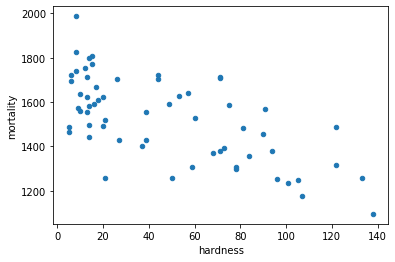

In [3]:
data.plot(kind='scatter', x='hardness', y='mortality')

In [5]:
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [4]:
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = data[['hardness']]
y = data['mortality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
X_train.shape

(48, 1)

In [14]:
y_train.shape

(48,)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.coef_

array([-3.28281845])

In [19]:
model.intercept_

1683.9212680875548

In [20]:
y_pred = model.predict(X_test)
y_pred

array([1339.22533049, 1651.09308355, 1637.96180974, 1539.47725614,
       1427.86142873, 1618.26489902, 1247.30641379, 1437.70988409,
       1614.98208057, 1664.22435737, 1490.23497934, 1418.01297337,
       1555.89134841])

In [21]:
model.score(X_test, y_test)

0.5099679408034544

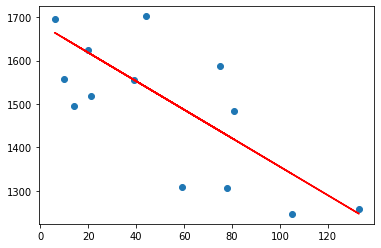

In [22]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [26]:
data_north = data[data.location == 'North']
data_south = data[data.location == 'South']

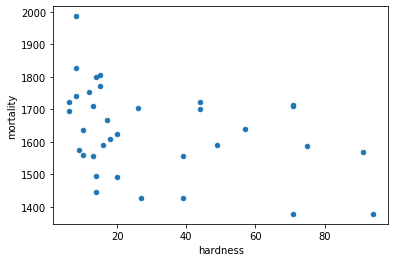

In [27]:
data_north.plot(kind='scatter', x='hardness', y='mortality')

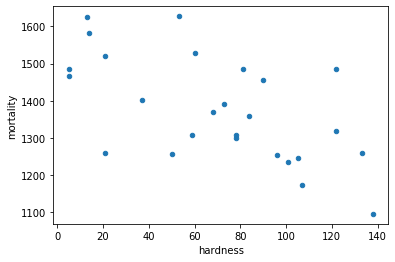

In [28]:
data_south.plot(kind='scatter', x='hardness', y='mortality')

In [35]:
data_north[['mortality', 'hardness']].corr()


,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [36]:
data_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [39]:
data_north[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [38]:
data_south[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [57]:
X = data_north[['hardness']]
y = data_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LinearRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.05527814233519435

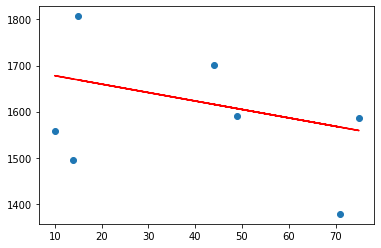

In [58]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [54]:
X = data_south[['hardness']]
y = data_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LinearRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
model.score(X_test, y_test)

-0.18389441286588637

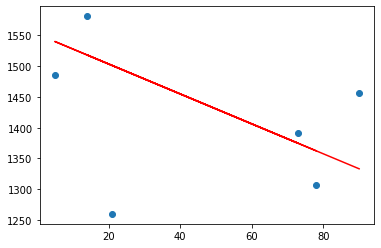

In [55]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')